# Task 2 (Part 2)
## Dataset Used : Delhi Weather Data

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [209]:
data_df = pd.read_csv("C:\\Users\\dell\\Downloads\\delhi-weather-data\\testset.csv")

### Data Enhancement

In [210]:
date = pd.to_datetime(data_df['datetime_utc'])  #bifurcation of datetime_utc
data_df.insert(0,'Year',date.dt.year)
data_df.insert(1,'Month',date.dt.month)
data_df.insert(2,'Day',date.dt.day)
data_df.insert(3,'Hour',date.dt.hour)

In [211]:
data_df=data_df.drop(['datetime_utc'],axis=1)

In [212]:
data_df.describe()

,Year,Month,Day,Hour,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,...,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100990.000000,100990.000000,100990.000000,100990.000000,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,...,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,2004.934588,6.579344,15.690049,10.928844,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,...,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,5.801997,3.475841,8.769718,6.854328,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,...,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,1996.000000,1.000000,1.000000,0.000000,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,2001.000000,4.000000,8.000000,5.000000,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,...,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,2003.000000,7.000000,16.000000,11.000000,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,...,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,2009.000000,10.000000,23.000000,17.000000,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,...,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,2017.000000,12.000000,31.000000,23.000000,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,...,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [213]:
data_df = data_df.drop([' _precipm'],axis=1)  #dropping unnecessary column

In [215]:
data_df.shape

(100990, 22)

### Outliers Removal 
#### ( Using InterQuartile Range (IQR))

In [216]:
df=data_df[[' _hail',' _rain',' _snow',' _thunder', ' _tornado', ' _fog' ]]

In [217]:
data_df=data_df.drop([' _wdire',' _conds',' _hail',' _rain',' _snow',' _thunder',' _tornado',' _fog'],axis=1)

In [219]:
Q1=data_df.quantile(0.05)
Q3=data_df.quantile(0.95)

In [220]:
IQR = Q3-Q1

In [221]:
fdata = data_df[~((data_df < (Q1 - 1.5 * IQR)) |(data_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [224]:
fdata.head()

,Year,Month,Day,Hour,_dewptm,_heatindexm,_hum,_pressurem,_tempm,_vism,_wdird,_wgustm,_windchillm,_wspdm
0,1996,11,1,11,9.0,NaN,27.0,1010.0,30.0,5.0,280.0,NaN,NaN,7.4
3,1996,11,1,14,10.0,NaN,41.0,1010.0,24.0,2.0,0.0,NaN,NaN,NaN
4,1996,11,1,16,11.0,NaN,47.0,1011.0,23.0,1.2,0.0,NaN,NaN,0.0
5,1996,11,1,17,12.0,NaN,56.0,1011.0,21.0,NaN,0.0,NaN,NaN,NaN
6,1996,11,1,18,13.0,NaN,60.0,1010.0,21.0,0.8,0.0,NaN,NaN,0.0


In [226]:
fdata.shape

(99925, 14)

### Ploting various numeric features

##### Year-Wise:

In [227]:
fdata=fdata.join(df)

In [228]:
yearwise = fdata.groupby('Year')

In [229]:
yeardata = yearwise.mean()

In [230]:
yeardata

,Month,Day,Hour,_dewptm,_heatindexm,_hum,_pressurem,_tempm,_vism,_wdird,_wgustm,_windchillm,_wspdm,_hail,_rain,_snow,_thunder,_tornado,_fog
Year,,,,,,,,,,,,,,,,,,,
1996,11.528363,15.922204,11.706645,5.990984,27.200000,53.564754,1016.185575,16.553191,2.212691,108.330632,NaN,4.957143,5.085213,0.000000,0.000000,0.000000,0.000000,0.00000,0.064830
1997,6.042439,15.738084,11.390182,17.071166,36.606066,68.188348,1009.005384,24.464166,3.031889,139.310847,36.650000,5.700000,8.598745,0.000000,0.030087,0.000000,0.010610,0.00000,0.085194
1998,6.646739,15.565503,11.096110,17.700086,36.454382,69.665033,1008.586670,24.866647,2.464572,127.310641,40.842857,5.343750,7.063794,0.000000,0.039760,0.000000,0.011156,0.00000,0.093535
1999,7.518661,15.926798,11.338139,14.613293,34.404966,49.854680,1007.040525,27.332796,2.839027,138.536120,37.114151,6.357895,7.637057,0.000000,0.016018,0.000000,0.007048,0.00016,0.059907
2000,7.591802,15.307131,11.446191,15.353283,34.825738,62.617796,1008.605839,23.868219,2.500713,143.853640,37.135000,6.306250,8.052640,0.000187,0.019839,0.000000,0.005615,0.00000,0.077110
2001,6.546964,15.660041,11.472791,14.535474,34.734955,54.662390,1007.857957,25.603469,2.664287,160.417283,38.617143,5.596460,8.860392,0.000000,0.017574,0.000000,0.011029,0.00000,0.060720
2002,6.506148,15.731646,11.492300,14.225706,36.417058,52.034122,1008.027098,26.477123,2.403834,156.645219,36.926115,6.336735,9.218090,0.000000,0.016832,0.000000,0.005969,0.00000,0.052764
2003,7.352404,15.940563,11.514380,15.991661,36.094103,59.926613,1007.843546,26.172252,2.641526,141.627425,36.704787,5.279167,8.212049,0.000000,0.022624,0.000000,0.005982,0.00000,0.071478
2004,4.425953,15.253893,11.364771,13.817627,34.659787,52.756331,1008.129863,26.010872,2.612516,157.413204,38.323214,5.838462,9.214476,0.000110,0.012700,0.000000,0.006847,0.00000,0.072336


In [235]:
parameters=fdata.columns[4:]

In [236]:
plt.style.use('classic')

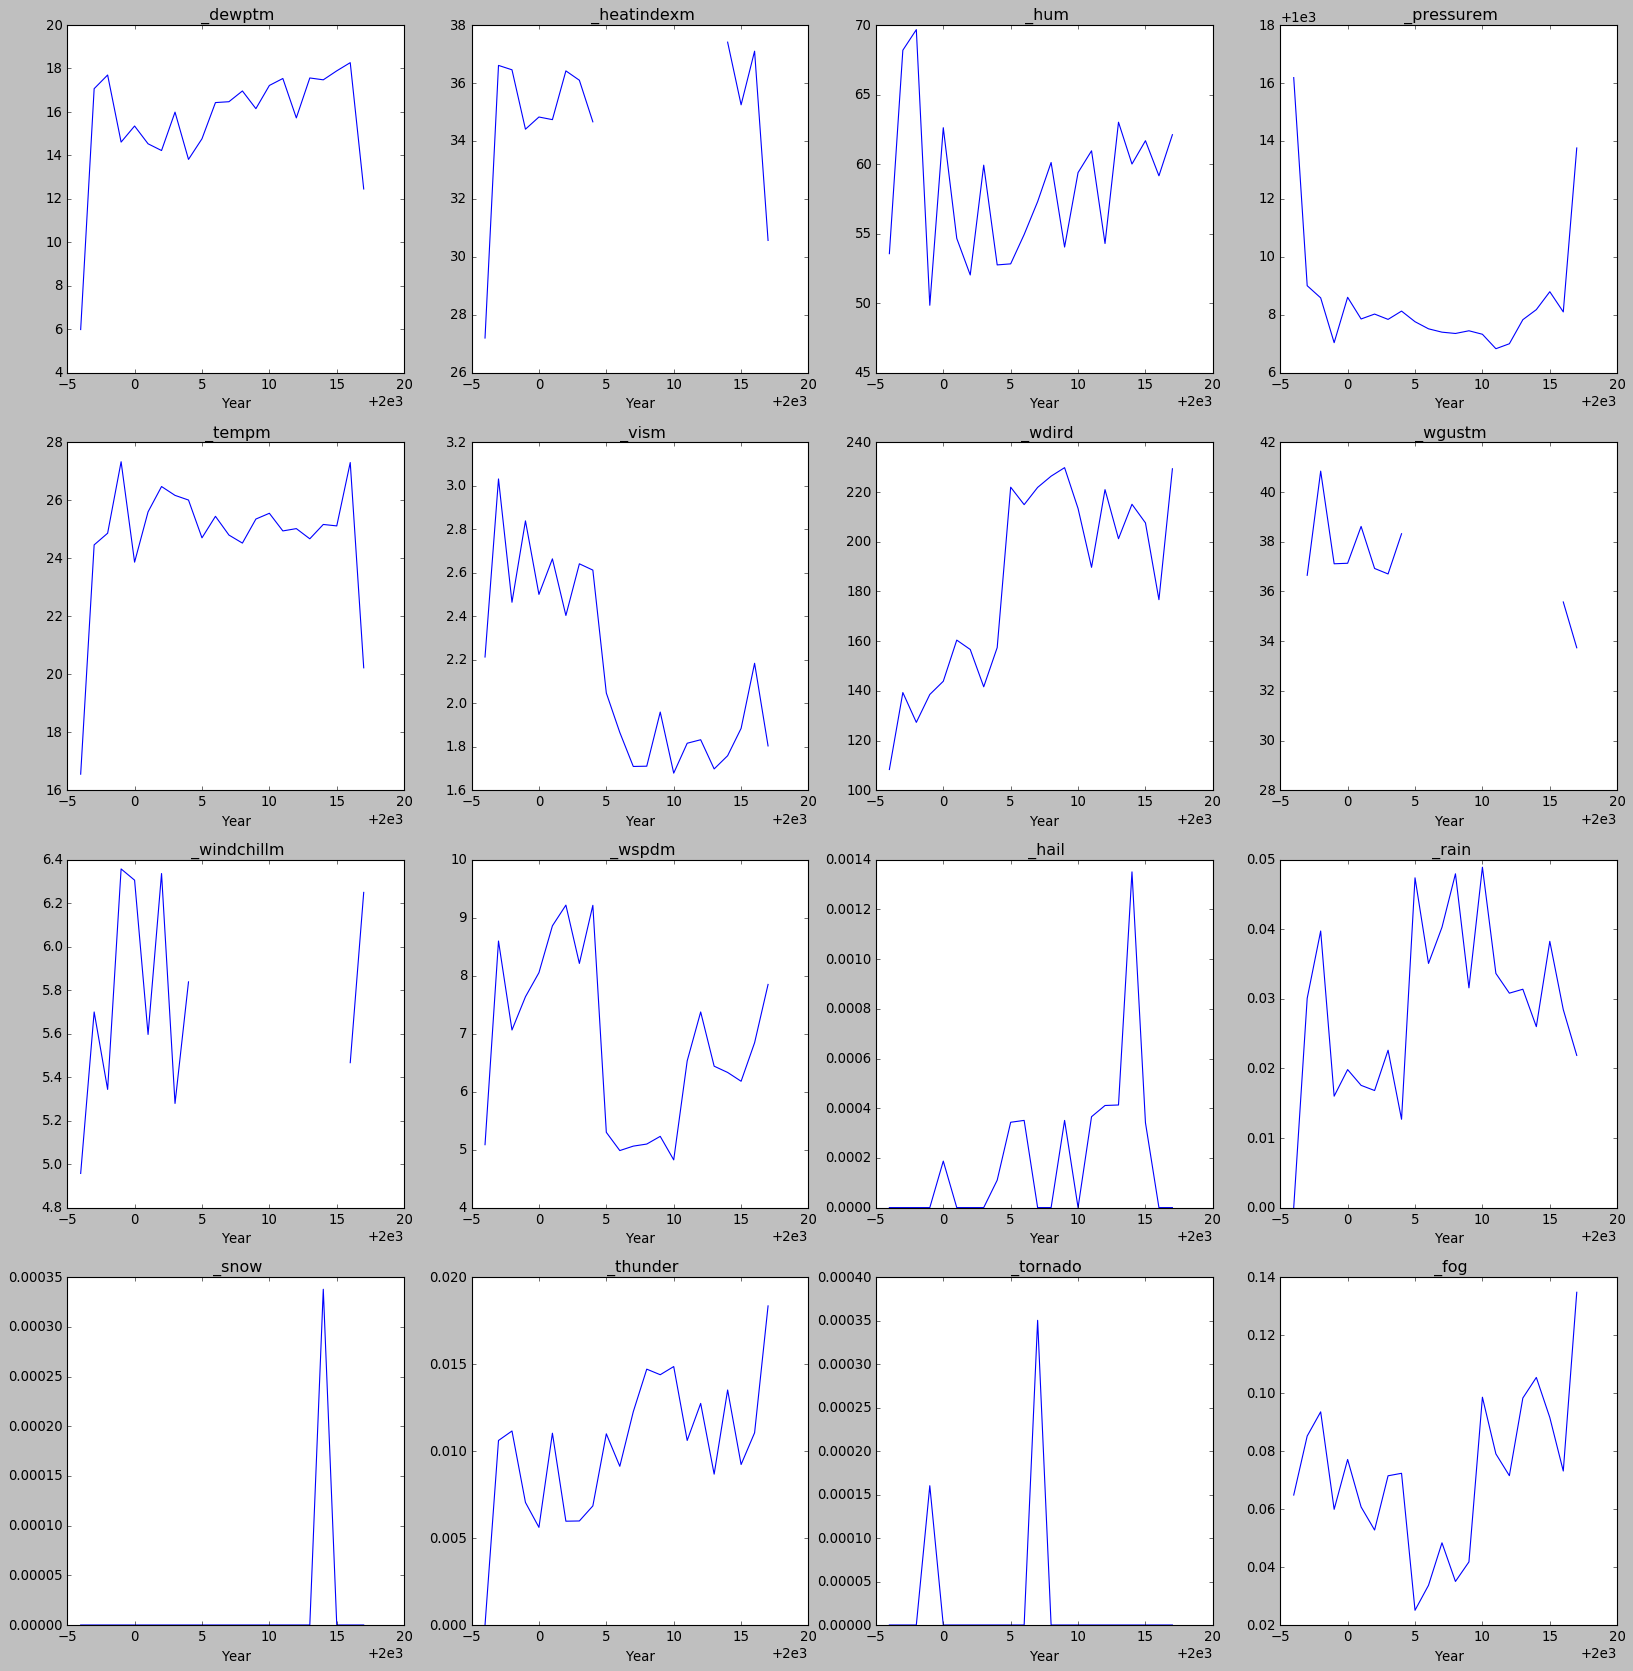

In [237]:
plt.subplots(nrows=4,ncols=4,figsize=(25,25))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.plot(yeardata[parameters[i]])
    plt.title(parameters[i])
    plt.xlabel('Year')
    
plt.show()

#### Month-Wise:

In [240]:
monthwise = fdata.groupby('Month')
monthdata = monthwise.mean()

In [241]:
parameters=fdata.columns[4:]
plt.style.use('classic')

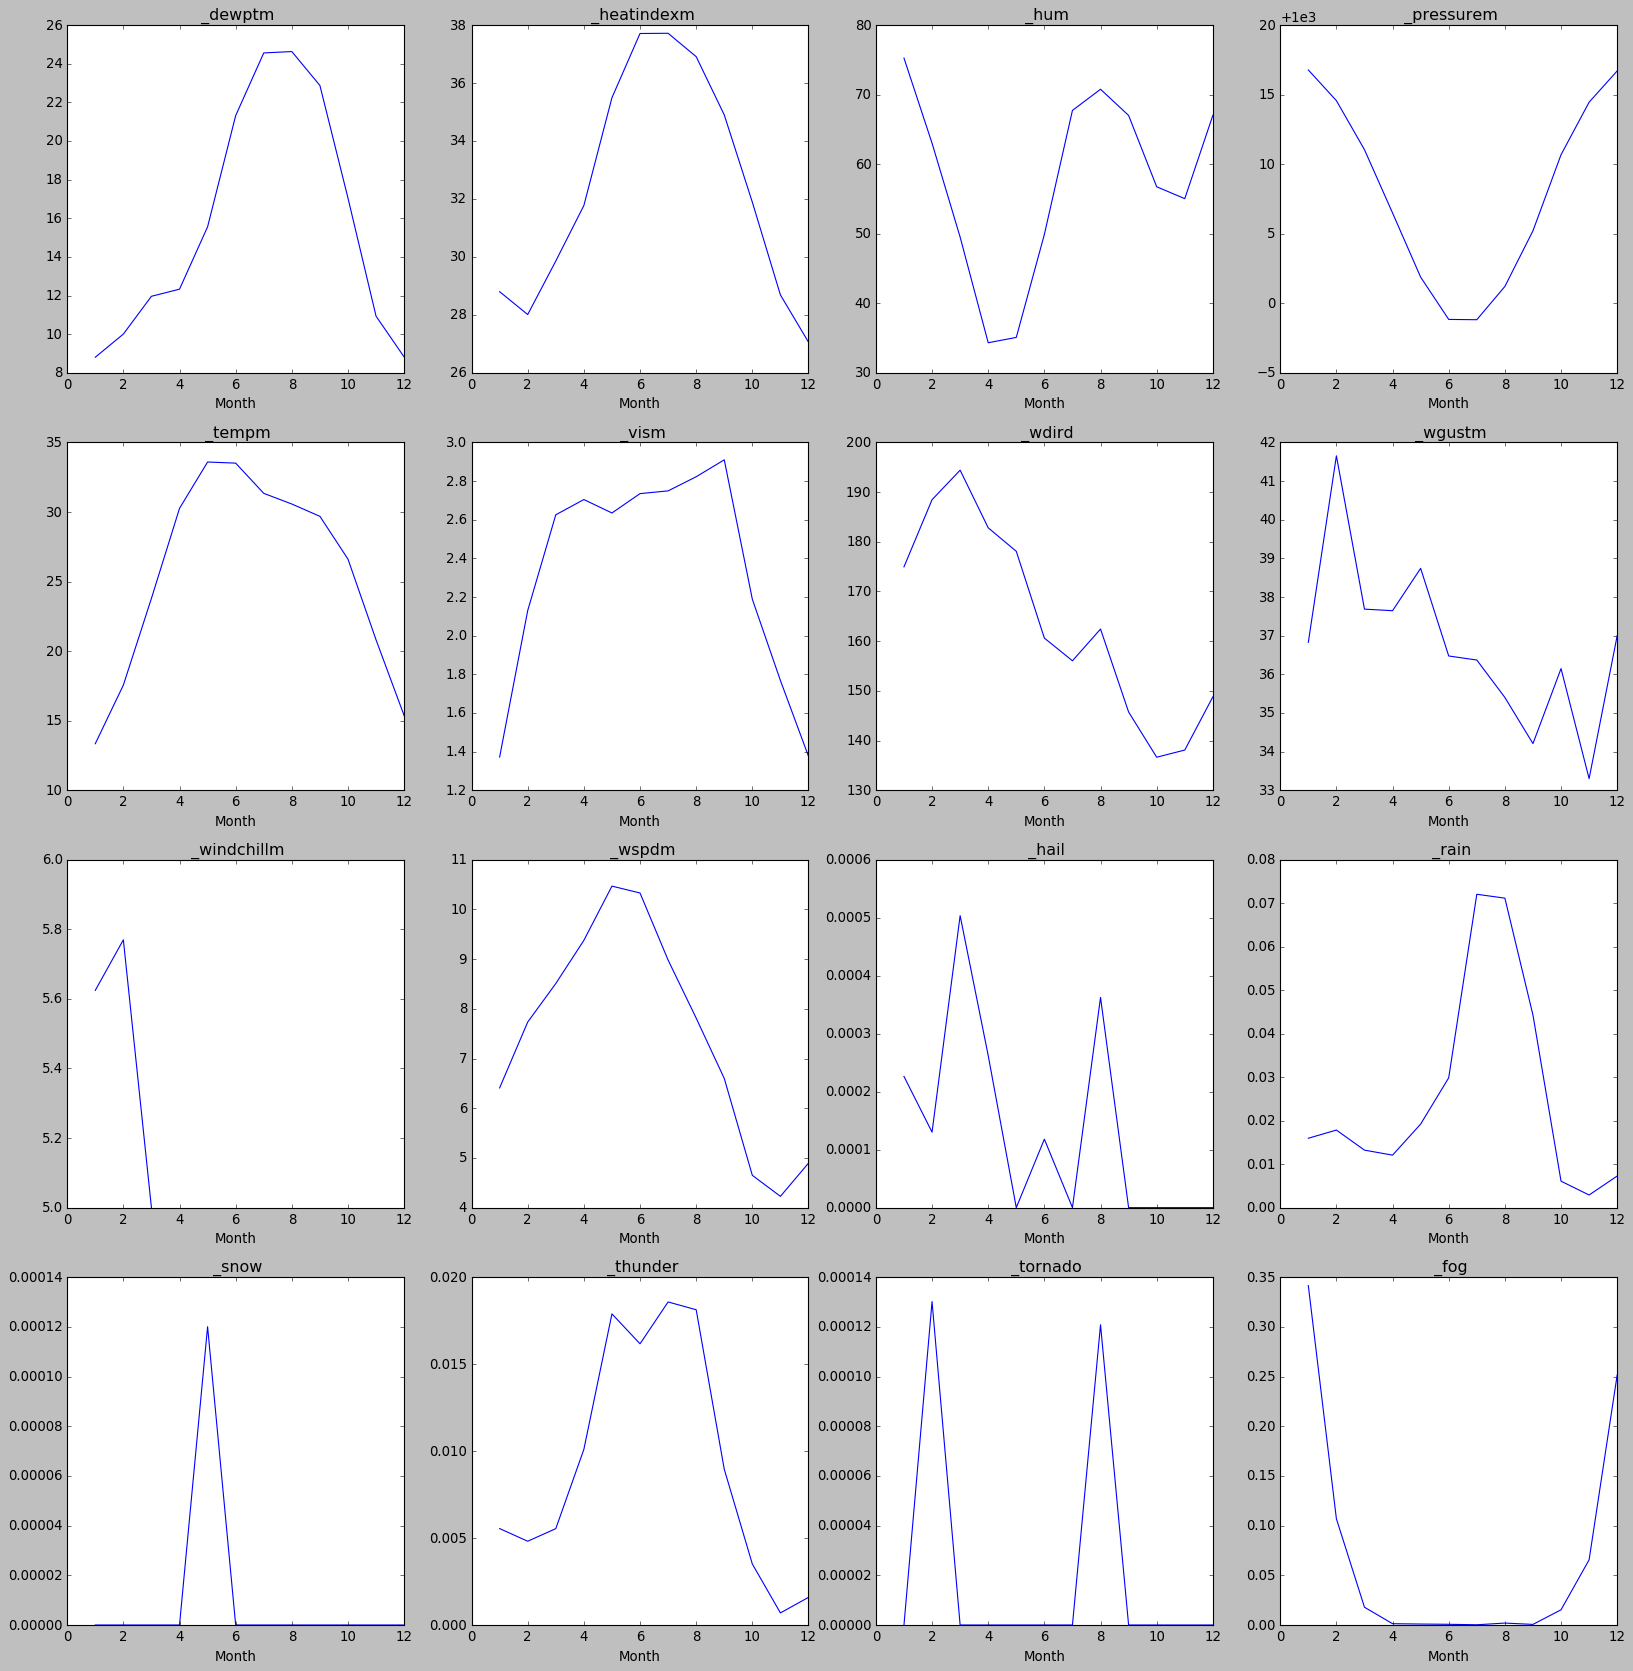

In [242]:
plt.subplots(nrows=4,ncols=4,figsize=(25,25))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.plot(monthdata[parameters[i]])
    plt.title(parameters[i])
    plt.xlabel('Month')
    
plt.show()

## Pie chart for different weather conditions in a Month

In [154]:
data_df2 = pd.read_csv("C:\\Users\\dell\\Downloads\\delhi-weather-data\\testset.csv")

In [156]:
date = pd.to_datetime(data_df2['datetime_utc'])
data_df2.insert(0,'Year',date.dt.year)
data_df2.insert(1,'Month',date.dt.month)
data_df2.insert(2,'Day',date.dt.day)

In [157]:
data_df2 = data_df2.drop(['datetime_utc'],axis=1)

In [159]:
m_weather = data_df2[['Month',' _conds']]

In [160]:
m = m_weather.groupby('Month')

In [161]:
duration ={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [169]:
colors = ['grey','lightskyblue','red','green','magenta']

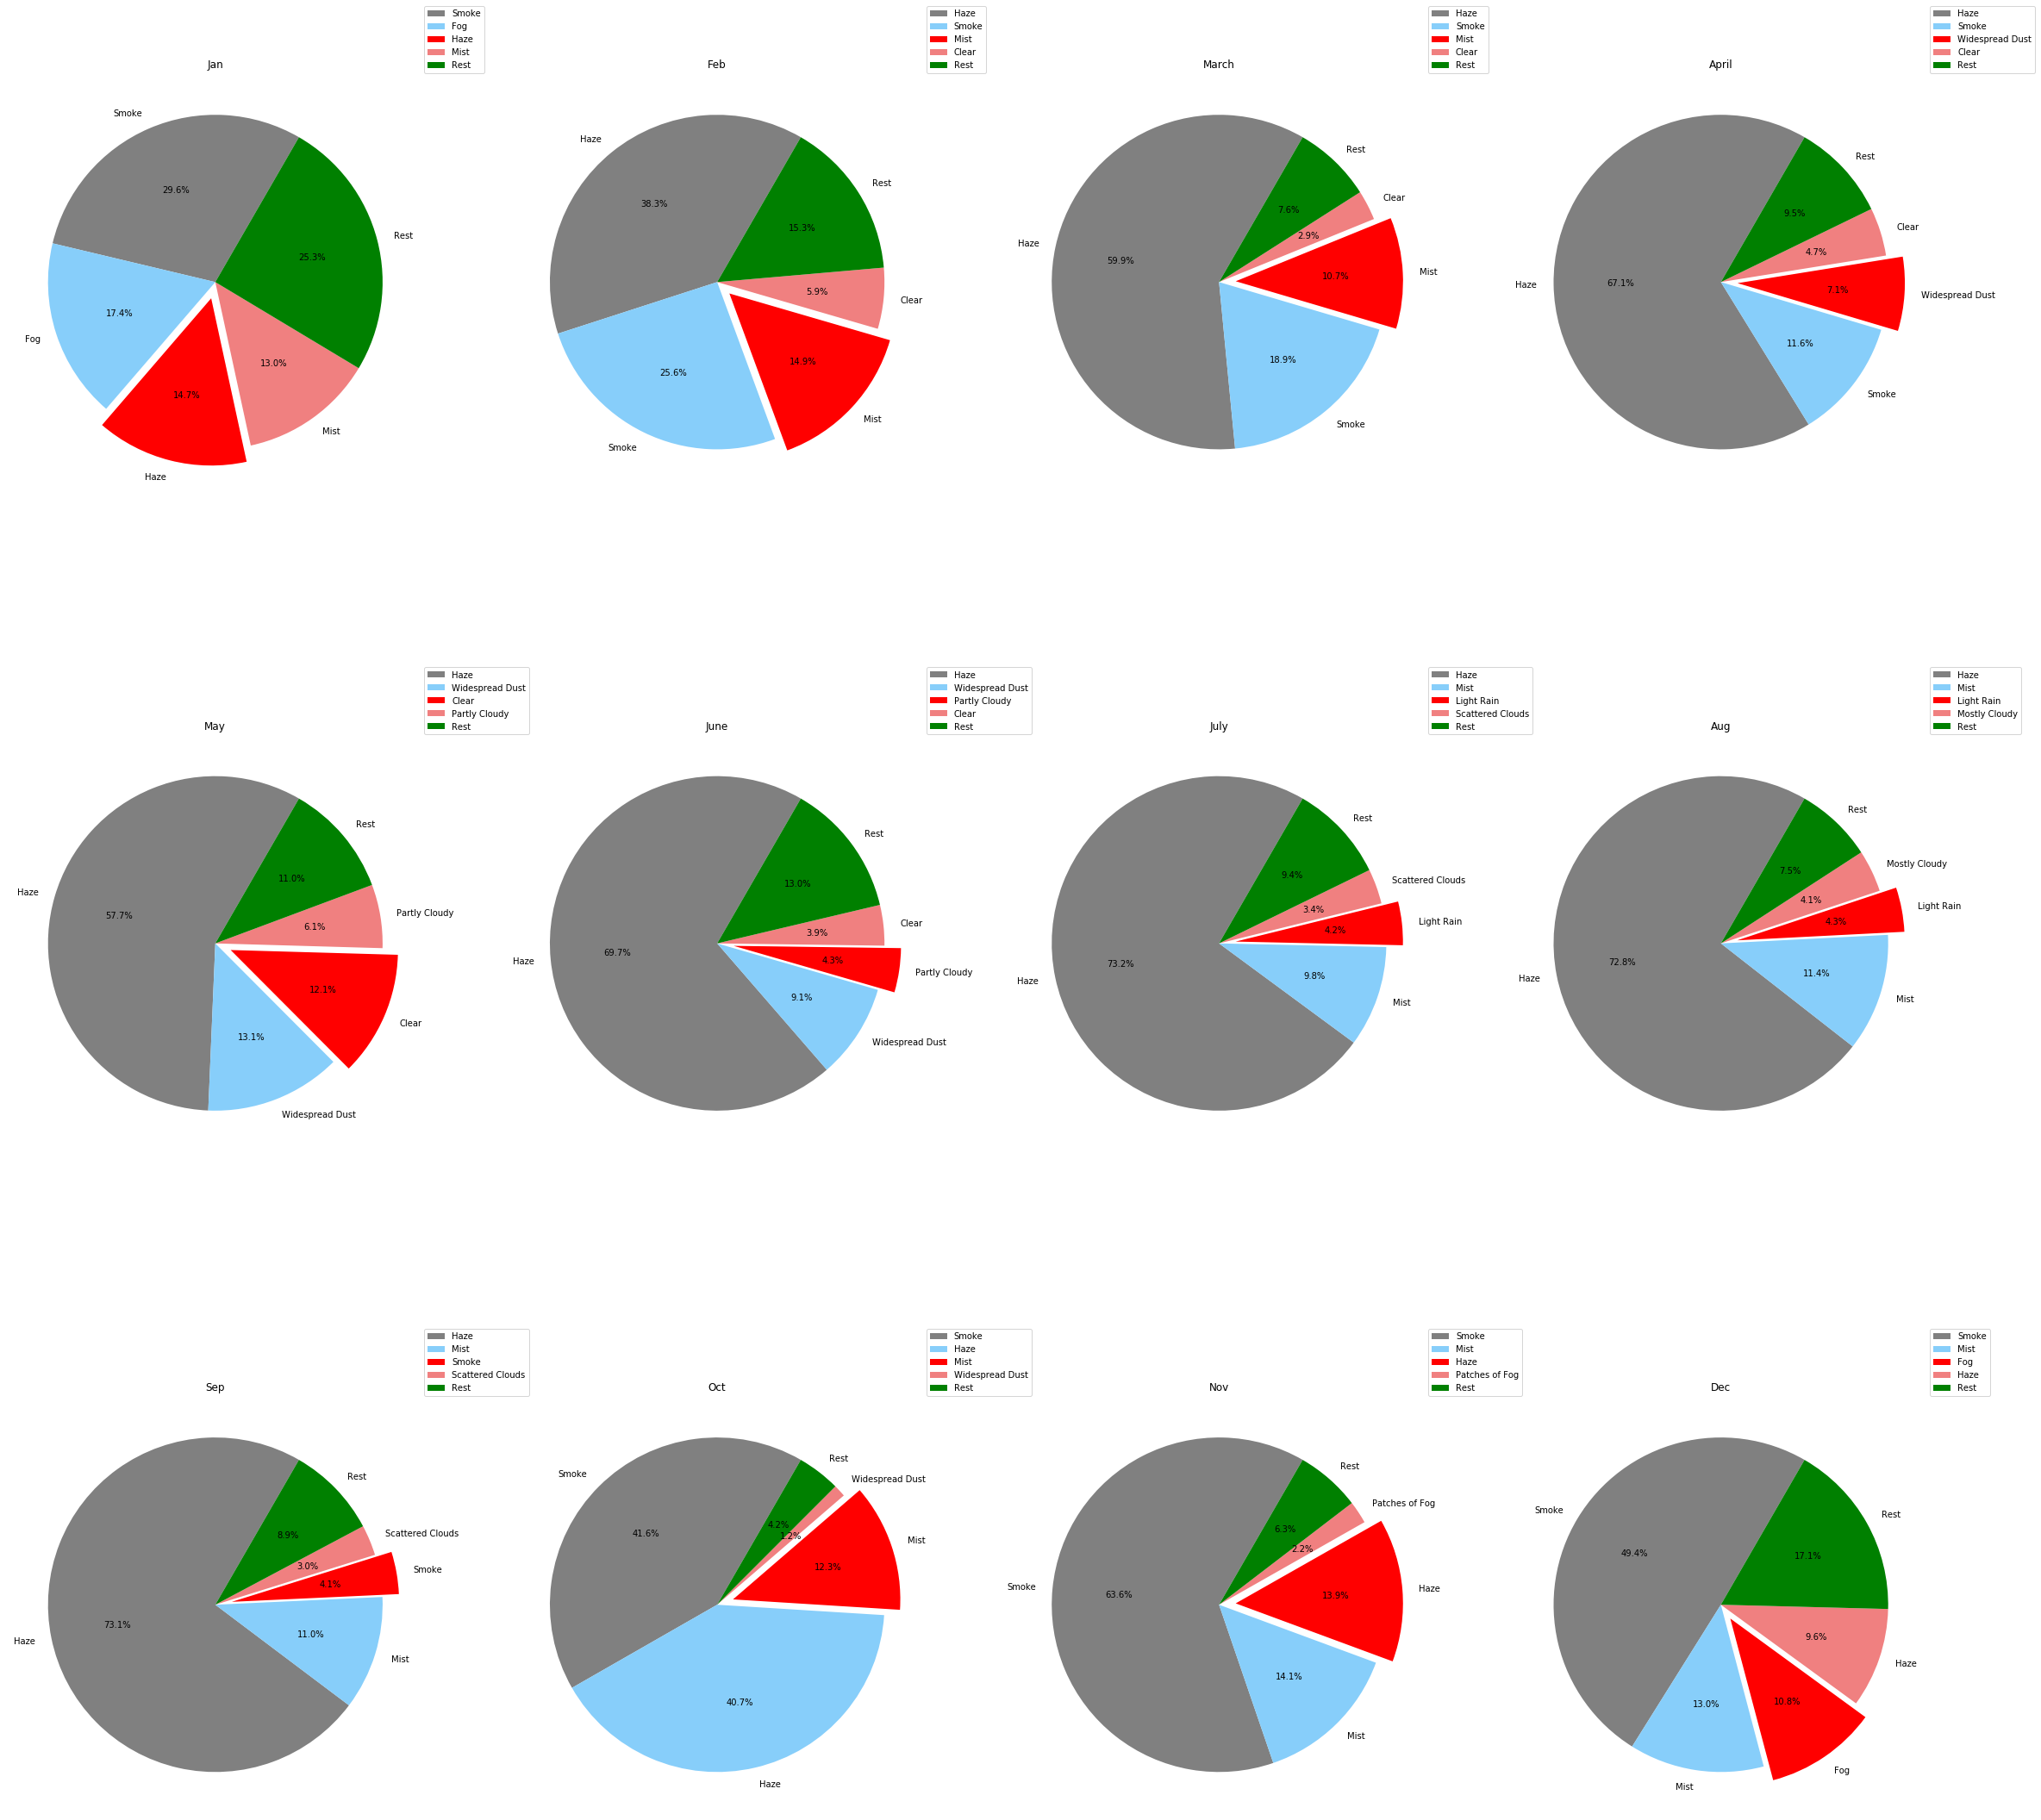

In [179]:
plt.subplots(figsize=(40,40))
var = int(1)

for i,group in m:
    plt.subplot(3,4,var)  
    plt.title(duration[i])
    month_data = group[' _conds'].value_counts(sort=True, ascending=False)
    explode = (0,0,0.1,0,0)
    
    #Selecting top 5 values significant values
    labels = month_data.index.tolist()[:4]
    sizes = month_data.tolist()[:4]
    
    #Adding all small values as rest in the pie-chart
    labels.append('Rest')
    sizes.append(sum(month_data.tolist()[5:]))
    
    plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', explode=explode,startangle=60)
    var = var+1
    plt.legend(loc=(1,1))
plt.show()

### Summarizing the above pie charts

In [187]:
data_df3 = pd.read_csv("C:\\Users\\dell\\Downloads\\delhi-weather-data\\testset.csv")

In [188]:
data_df3 = data_df3.loc[:,'datetime_utc':' _conds']

In [190]:
data_df3 = data_df3.loc[:,'datetime_utc':' _conds']

In [191]:
data_df3

,datetime_utc,_conds
0,19961101-11:00,Smoke
1,19961101-12:00,Smoke
2,19961101-13:00,Smoke
3,19961101-14:00,Smoke
4,19961101-16:00,Smoke
5,19961101-17:00,Smoke
6,19961101-18:00,Smoke
7,19961101-19:00,Smoke
8,19961101-20:00,Smoke
9,19961101-21:00,Smoke


In [195]:
data_df3['datetime_utc'] = pd.to_datetime(data_df3['datetime_utc'])
data_df3 = data_df3.set_index('datetime_utc')

In [196]:
weather = dict()

In [197]:
for index,row in data_df3.iterrows():
    yr = index.year
    month = index.month
    cond = row[' _conds']
    if yr == 1997 and month == 1:
        if cond not in weather:
            weather[cond]=0
        weather[cond]+=1

([<matplotlib.patches.Wedge at 0x181ec51a7f0>,
 [Text(-0.14576131516045276, 1.0902997931774066, 'Fog'),
  Text(-0.9183907669483646, 0.605440665287685, 'Unknown'),
  Text(-1.068003541528588, 0.263378881618086, 'Shallow Fog'),
  Text(0.06688961208769696, -1.0979643800209358, 'Smoke'),
  Text(1.088086087702734, 0.1614579380140787, 'Clear'),
  Text(1.048956160743384, 0.3311962753994987, 'Scattered Clouds'),
  Text(1.024328416981211, 0.4009380178590784, 'Patches of Fog'),
  Text(0.9638694762633297, 0.5300524811071587, 'Haze'),
  Text(0.8809311263254881, 0.6587566703046785, 'Thunderstorms and Rain'),
  Text(0.8482826897916269, 0.7002974212432048, 'Overcast'),
  Text(0.8242596766445032, 0.7284201984142801, 'Rain'),
  Text(0.7809248894423908, 0.7746975648918679, 'Mostly Cloudy'),
  Text(0.7231260733447602, 0.8289081264223369, 'Partly Cloudy')],
 [Text(-0.0795061719057015, 0.5947089780967671, '26.5%'),
  Text(-0.5009404183354715, 0.33024036288419184, '0.8%'),
  Text(-0.5825473862883207, 0.14366

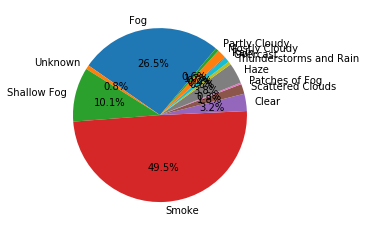

In [208]:
plt.pie(list(weather.values()),labels=weather.keys(),startangle = 50,autopct="%1.1f%%")